In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as ts
import numpy as np

In [31]:
GME = pd.read_csv("GME.csv")
AMC = pd.read_csv("AMC.csv")

In [32]:
GME = GME.iloc[::-1].reset_index()
AMC = AMC.iloc[::-1].reset_index()

In [33]:
#GME["Last Price"] = GME["Last Price"].replace(",", ".")
#data['amount'] = data['amount'].apply(lambda x: x.replace('EUR', '')).apply(lambda x: x.replace('.', '')).apply(lambda x: x.replace(',', '.')).astype('float')
GME['Last Price'] = GME['Last Price'].apply(lambda x: x.replace(',', '.')).astype('float')
GME['Last Price'] 

0        2.4875
1        2.4575
2        2.4777
3        2.4700
4        2.4725
         ...   
2435    51.4475
2436    51.1053
2437    50.7500
2438    51.1512
2439    51.0925
Name: Last Price, Length: 2440, dtype: float64

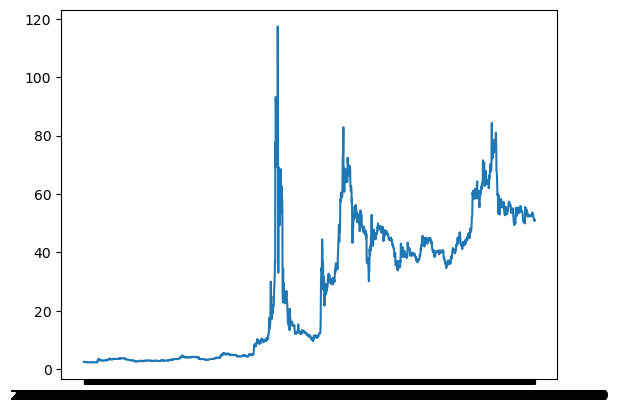

In [34]:
plt.plot(GME['Date'],GME['Last Price'])

/tmp/ipykernel_84/3464805922.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GME['close_lag'][0] = GME['close_lag'][1]
/tmp/ipykernel_84/3464805922.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GME['close_returns'][0] = GME['close_returns'].median()


      index  Unnamed: 0                 Date  Last Price   Volume  SMAVG (15)   
0      2439        2439  2020-10-01 15:30:00      2.4875  3374880         NaN  \
1      2438        2438  2020-10-01 16:00:00      2.4575  1599976         NaN   
2      2437        2437  2020-10-01 16:30:00      2.4777  1115172         NaN   
3      2436        2436  2020-10-01 17:00:00      2.4700  1178820         NaN   
4      2435        2435  2020-10-01 17:30:00      2.4725   696852         NaN   
...     ...         ...                  ...         ...      ...         ...   
2435      4           4  2021-07-01 19:30:00     51.4475   434068    491737.0   
2436      3           3  2021-07-01 20:00:00     51.1053   468276    509266.0   
2437      2           2  2021-07-01 20:30:00     50.7500   402492    502972.0   
2438      1           1  2021-07-01 21:00:00     51.1512   560752    525371.0   
2439      0           0  2021-07-01 21:30:00     51.0925   772280    554211.0   

      close_lag  first diff

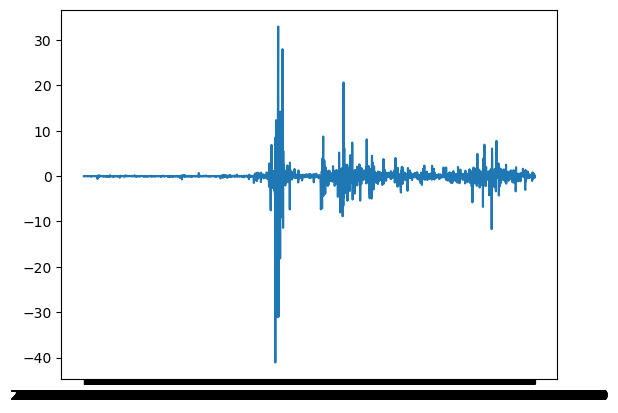

In [37]:
GME['close_lag'] = GME['Last Price'].shift(1, axis = 0)
GME['close_lag'][0] = GME['close_lag'][1] 
GME['first diff'] = GME['close_lag'] - GME['Last Price']

GME['close_returns'] = (GME['Last Price'] - GME['close_lag'])/GME['close_lag']
GME['close_returns'][0] = GME['close_returns'].median()

print(GME)

plt.plot(GME['Date'], GME['first diff'])

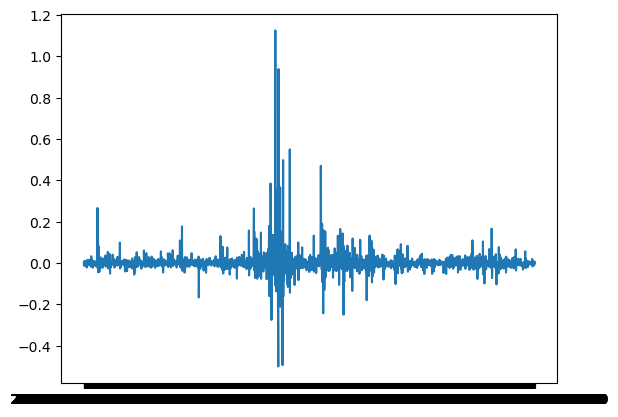

In [29]:
plt.plot(GME['Date'], GME['close_returns'])

In [39]:
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
series = GME['Last Price']
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.049577
p-value: 0.265267
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [38]:
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
series = GME['first diff']
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -9.033514
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [40]:
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
series = GME['close_returns']
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.830933
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [41]:
AMC['Last Price'] = AMC['Last Price'].apply(lambda x: x.replace(',', '.')).astype('float')
AMC['Last Price'] 

0        2.9255
1        2.8945
2        2.9100
3        2.9062
4        2.8883
         ...   
2448    33.5871
2449    33.0169
2450    32.7442
2451    33.3764
2452    33.6119
Name: Last Price, Length: 2453, dtype: float64

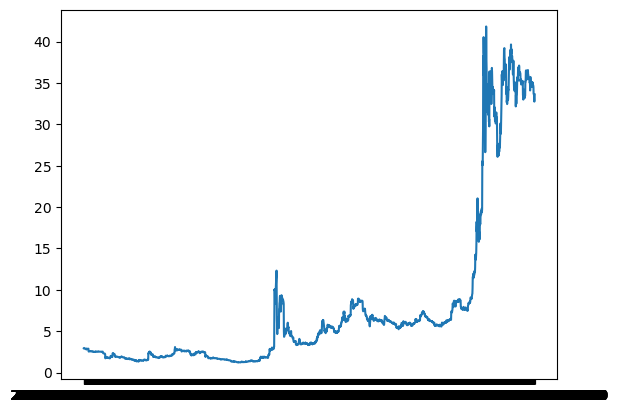

In [42]:
plt.plot(AMC['Date'], AMC['Last Price'])

/tmp/ipykernel_84/745683579.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AMC['close_lag'][0] = AMC['close_lag'][1]
/tmp/ipykernel_84/745683579.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AMC['close_returns'][0] = AMC['close_returns'].median()


      index  Unnamed: 0                 Date  Last Price   Volume  SMAVG (15)   
0      2452        2452  2020-10-01 15:30:00      2.9255  1015250         NaN  \
1      2451        2451  2020-10-01 16:00:00      2.8945   312589         NaN   
2      2450        2450  2020-10-01 16:30:00      2.9100   399241         NaN   
3      2449        2449  2020-10-01 17:00:00      2.9062   154345         NaN   
4      2448        2448  2020-10-01 17:30:00      2.8883   239469         NaN   
...     ...         ...                  ...         ...      ...         ...   
2448      4           4  2021-07-01 19:30:00     33.5871  3740519   4771240.0   
2449      3           3  2021-07-01 20:00:00     33.0169  7005200   5081505.0   
2450      2           2  2021-07-01 20:30:00     32.7442  8793597   5377242.0   
2451      1           1  2021-07-01 21:00:00     33.3764  8957446   5854175.0   
2452      0           0  2021-07-01 21:30:00     33.6119  5639759   6057839.0   

      close_lag  first diff

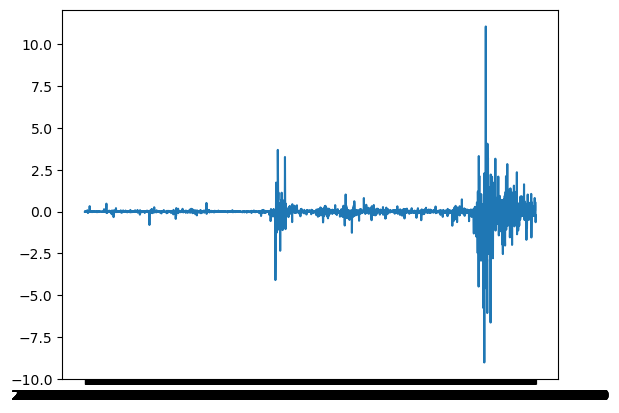

In [43]:
AMC['close_lag'] = AMC['Last Price'].shift(1, axis = 0)
AMC['close_lag'][0] = AMC['close_lag'][1] 
AMC['first diff'] = AMC['close_lag'] - AMC['Last Price']

AMC['close_returns'] = (AMC['Last Price'] - AMC['close_lag'])/AMC['close_lag']
AMC['close_returns'][0] = AMC['close_returns'].median()

print(AMC)

plt.plot(AMC['Date'], AMC['first diff'])

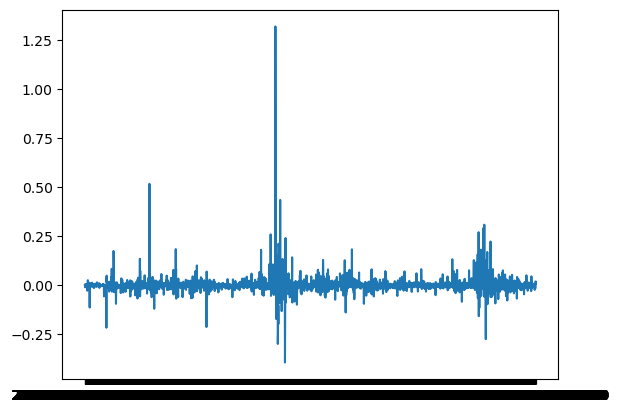

In [44]:
plt.plot(AMC['Date'], AMC['close_returns'])

In [45]:
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
series = AMC['Last Price']
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.664720
p-value: 0.989107
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [46]:
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
series = AMC['fist diff']
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

KeyError: 'fist diff'

In [ ]:
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
series = AMC['close_returns']
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))